<a href="https://colab.research.google.com/github/Ian-mbaya/MyHub/blob/main/ETL_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Importing Functions & Modules

In [ ]:

import pandas as pd
import numpy as np
import sqlite3
#Connect DATABASE AND load cursor
cn = sqlite3.connect('MYDB')
cr = cn.cursor()

import glob #match files or folders
import xml.etree.ElementTree as ET #Parse and Create XML

import matplotlib.pyplot as plt



In [ ]:
#Mount Google Drive
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
#Set paths
csvfile = 'https://raw.githubusercontent.com/Ian-mbaya/HotelWebsite/master/cars.csv'
jsonfile = 'https://raw.githubusercontent.com/Ian-mbaya/HotelWebsite/master/cars.json'
xmlfile = 'https://raw.githubusercontent.com/Ian-mbaya/HotelWebsite/master/cars.xml'
logfile = 'https://raw.githubusercontent.com/Ian-mbaya/HotelWebsite/master/.text'
targetfile = 'https://raw.githubusercontent.com/Ian-mbaya/HotelWebsite/master/transformed.csv'

##Question 1
###Method to extact & append Data to a Dataframe

In [ ]:
#Extract CSV
def extract_from_csv(csvfile):
  data = pd.read_csv(csvfile) 
  return data

In [ ]:
#Extract JSON
def extract_from_json(xmlfile):
    data = pd.read_json(jsonfile, lines=True)
    return data

In [ ]:
#Extract XML
def extract_from_xml(file_to_process):

    data = pd.DataFrame(columns=['car_model','year_of_manufacture','price', 'fuel'])

    tree = ET.parse(file_to_process) 

    root = tree.getroot() 

    for person in root: 

        car_model = person.find("car_model").text 

        year_of_manufacture = int(person.find("year_of_manufacture").text)
        price = float(person.find("price").text) 

        fuel = person.find("fuel").text 

        dataframe = dataframe.append({"car_model":car_model, "year_of_manufacture":year_of_manufacture, "price":price, "fuel":fuel}, ignore_index=True) 

        return data

    

In [ ]:
def extract():
    data = pd.DataFrame(columns=['car_model','year_of_manufacture','price', 'fuel']) 
  
    for csvfile in glob.glob("/con/content/gdrive/MyDrive/CIS660/car-data/*.csv"):
          data = data.append(extract_from_csv(csvfile), ignore_index=True)
    
    for jsonfile in glob.glob("/con/content/gdrive/MyDrive/CIS660/car-data/*.json"):
          data = data.append(extract_from_json(jsonfile), ignore_index=True)

    for xmlfile in glob.glob("'/con/content/gdrive/MyDrive/CIS660/car-data/*.xml"):
          data =data.append(extract_from_xml(xmlfile), ignore_index=True)
    return data

##Question 2
###Data Transformation


In [ ]:
def transform(data):
      #Change Model into Upper Case
       data['car_model'].str.upper()
       #Round Price to two decimal places
       data['price'] = round(data.price, 2)
       #Converts fuel type to A to a categorical variable
       data['team'] = pd.factorize(data['team'])[0]
       #Adds the age of the car
       car_age = 2022 - data['year_of_manufacture']
       data.insert(1, 'Car_age', car_age)
       return data
  

##Question 3
###Load data in to sqlite


In [ ]:
#Create Table 
cr.execute(
    '''CREATE TABLE MyCars
    (
      model text,
      year real,
      price real, 
      fuel int,
      age int)
    ''')

In [ ]:
#Insert into SQLITE
df.to_sql('MyCars', cn, if_exists='replace', index=False)
cn.commit()
cn.close()

##Question 4
###Data Analysis and Ploting

Text(0, 0.5, 'Number of Cars')

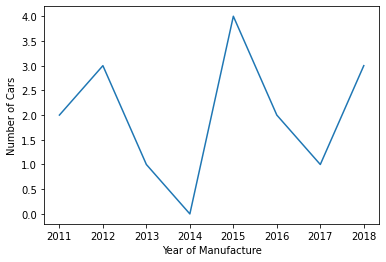

In [ ]:
#graph for The number of cars manufactured in each  year
plt.plot(year, manufactured)
plt.xlabel('Year of Manufacture')
plt.ylabel('Number of Cars')


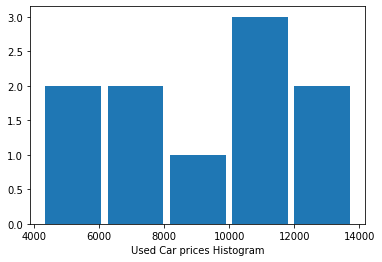

In [ ]:
#Histogram
plt.xlabel('Used Car prices Histogram')
plt.hist(df['price'], rwidth=0.9, bins=5)
plt.show()


In [1]:
#Piechart
plt.title(, loc='left', color='r')
plt.pie(count'Used Car Fuel Types', labels=fueltypes,  radius=1.5, autopct='%.1f%%')
plt.show()

SyntaxError: ignored


##Question 5
###Log Phase


In [ ]:
#Loading
def load(targetfile, data):
    data.to_csv(data)

In [ ]:
#Logging
def log(message):
    timestamp_format = '%H:%M:%S-%h-%d-%Y'
    #Hour-Minute-Second-MonthName-Day-Year
    now = datetime.now() # get current timestamp
    timestamp = now.strftime(timestamp_format)
    with open("logfile.txt","a") as f: f.write(timestamp + ',' + message + 'n')